# Introduction to PyTorch

### Modified by Thomas McDonald, 25th October 2021

### 28th October 2020 by Juan-José Giraldo and Mauricio A Álvarez

In this notebook, we will look at the PyTorch library in Python (also known by its import name, `torch`) which allows for automatic differentiation. PyTorch will also be used to implement different neural network models later on.

### Tensors

A tensor generalises the concept of vectors and matrices to an arbitrary number of dimensions. Another name for the same concept is a multidimensional array. The dimensionality of a tensor is the number of indexes required to refer to scalar values within the tensor. The cell below shows an example initialising a Tensor uniformly in 1D, 2D and 3D:

In [1]:
# We first import the torch library that comes with the Anaconda distribution
import torch

# Tensor 1D presents 1 index
y = torch.rand([2])
print("Tensor 1D presents one index", "with shape", y.shape, ":\n", y)  # get specific size with .shape

# Tensor 2D presents 2 indexes
y = torch.rand([2, 3])
print("\nTensor 2D presents two indexes", "with shape", y.shape, ":\n", y)

# Tensor 3D presents 3 indexes
y = torch.rand([5, 2, 3])
print("\nTensor 3D presents three indexes", "with shape", y.shape, ":\n", y)

Tensor 1D presents one index with shape torch.Size([2]) :
 tensor([0.8152, 0.4301])

Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.9681, 0.8170, 0.0172],
        [0.3840, 0.5122, 0.8202]])

Tensor 3D presents three indexes with shape torch.Size([5, 2, 3]) :
 tensor([[[0.8578, 0.0543, 0.6809],
         [0.4462, 0.8442, 0.5043]],

        [[0.1969, 0.5469, 0.8446],
         [0.4568, 0.8216, 0.7234]],

        [[0.7251, 0.3551, 0.3625],
         [0.4749, 0.2704, 0.1940]],

        [[0.3561, 0.3122, 0.4120],
         [0.5788, 0.1817, 0.9749]],

        [[0.3795, 0.2134, 0.5733],
         [0.1803, 0.2161, 0.6774]]])


In [2]:
# Create a tensor with specific values
x = torch.tensor([4.0, 5.0], dtype=torch.float32)
y = torch.tensor([2.0, 3.0], dtype=torch.float32)

# Tensor multiplication (point-wise multiplication)
print(x * y)

tensor([ 8., 15.])


### Initialise a tensor with torch.zeros or torch.ones 

In [3]:
x_zeros = torch.zeros([3, 4])
print("x_zeros:", x_zeros, "with shape", x_zeros.shape, "\n")

x_ones = torch.ones([2, 6])
print("x_ones:", x_ones, "with shape", x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


### Reshape a tensor using .view

In [4]:
y = torch.ones([3, 2])
y_reshaped = y.view(6, 1)  # in contrast to the common NumPy library, we use .view instead of .reshape
print(y_reshaped)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


### Numpy interoperability 

PyTorch tensors can be converted efficiently to NumPy arrays and vice versa. By doing so, you can leverage the huge swathes of functionality in the wider Python ecosystem which has built up around the NumPy array type.

In [5]:
import numpy as np

# tensor_torch to tensor numpy
tensor_torch = torch.ones(3, 4)
tensor_numpy = (tensor_torch.numpy())  # returns a NumPy multidim. array of the correct size, shape and numerical type.
print("Array in numpy form with shape", tensor_numpy.shape, ":\n", tensor_numpy)

# tensor_numpy to tensor_torch
tensor_np = np.random.randn(5, 8)
tensor_numpy_to_torch = torch.from_numpy(tensor_np)
print(
    "\nArray from Numpy to Torch with shape",
    tensor_numpy_to_torch.shape,
    ":\n",
    tensor_numpy_to_torch,
)

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[-1.6013, -1.0218, -1.2912,  0.8110, -0.7336,  0.0421, -2.0424,  1.1263],
        [ 0.8235, -0.4590, -0.7681, -0.9724, -0.6552, -0.4915,  0.6950,  0.6480],
        [ 1.2440, -0.9016,  0.0891, -0.8635, -1.3515,  0.2524, -0.8019, -0.5409],
        [-2.0137,  1.4414, -0.9489,  0.6487, -0.4727, -1.0247,  0.8116, -0.4644],
        [-0.1463, -0.3564, -0.2213,  0.7856, -0.1937,  0.3885, -0.6482,  0.7994]],
       dtype=torch.float64)


## Automatic Differentiation

PyTorch allows us to automatically obtain the gradients of a tensor with respect to a defined function. When creating the tensor, we have to indicate that it requires the gradient computation using the flag `requires_grad`  

In [6]:
x = torch.rand(3, requires_grad=True)
print(x)

tensor([0.6513, 0.2336, 0.9373], requires_grad=True)


Notice that now the tensor shows the flag `requires_grad` as True. We can also activate such a flag in a tensor which has already been created as follows:

In [7]:
x = torch.tensor([1.0, 2.0, 3.0])
x.requires_grad_(True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


Let us define a function $y=x^2+5$. The function $y$ will not only carry the result of evaluating $x$, but also the gradient function $\frac{\partial y}{\partial x}$ called `grad_fn` in the new tensor $y$:

In [8]:
x = torch.tensor([2.0])
x.requires_grad_(True)  # indicate we will need the gradients with respect to to this variable
y = x ** 2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To evaluate the partial derivative $\frac{\partial y}{\partial x}$, we use the `.backward()` function and the result of the gradient evaluation is stored in `x.grad` :

In [9]:
y.backward()  # dy/dx
print("PyTorch gradient:", x.grad)

# Let us compare with the analytical gradient of y = x**2 + 5
with torch.no_grad():  # this allows us to use only use the tensor value, without its gradient information
    dy_dx = 2 * x  # analytical gradient
print("Analytical gradient:", dy_dx)

PyTorch gradient: tensor([4.])
Analytical gradient: tensor([4.])


If we evaluate a vector $\mathbf{w}=[w_1, \ldots, w_D]^{\top}$, to compute another vector $\mathbf{g}=[g_1, \ldots, g_D]^{\top}$ with elements $g_i=w_i^2+5$, then we obtain a vector $\mathbf{g}$ that contains each evaluation of the function. If we want to obtain the gradient w.r.t $\mathbf{w}$ by using "g.backward()", we have to pass a vector of size equal to w.shape to the function, i.e., "g.backward(vect)". 

In [10]:
w = torch.tensor([1.0, 2.0, 3.0])
w.requires_grad_(True)

g = w ** 2 + 5

# Below, the values [1.0, 1.0, 1.0] are multiplied by the gradient g.backward(vect);
# of course using this vector of ones does not modify the value of the gradient
vect = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float32)
g.backward(vect)
print(w.grad)

tensor([2., 4., 6.])


On the other hand, when accessing the gradients in a for loop, PyTorch acummulates the gradients at each
iteration. In order to avoid this behaviour, we have to use the function .grad.zero_() also at each iteration. See in the example below what happens when commenting and uncommenting the line "w.grad.zero_()":

In [11]:
#Pytorch uses a cumulative process for the gradients
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

for i in range(3):
    g = w**2+5
    g.backward(torch.ones_like(w))
    print(w.grad)
    w.grad.zero_()    #this line avoids the acummulation of the gradients uncomment it to see its effect

tensor([2., 4., 6.])
tensor([2., 4., 6.])
tensor([2., 4., 6.])


###  Question 1

Verify that the gradients provided by PyTorch are identical to the analytical gradients of the function $f = \exp \big(-x^2-2x- \sin (x) \big)$ w.r.t $x$.

In [12]:
## ANSWER ##
x = torch.tensor([2.0])
x.requires_grad_(True)  # We will need the gradients with respect to this variable
y = torch.exp(-(x ** 2) - 2 * x - torch.sin(x))

# we can also write y as:
# y= e(-x^2).e(-2x).e(-sin(x))
# dy/dx= e(-2x)e(-sin(x))(-2xe(-x^2))+ e(-x^2)e(-sin(x))(-2e(-2x))+ e(-x^2).e(-2x)(-cos(x)e(-sin(x)))

y.backward()  # dy/dx
print("PyTorch gradient:", x.grad)

with torch.no_grad():
    dy_dx = (
        torch.exp(-2 * x) * torch.exp(-torch.sin(x)) * (-2 * x * torch.exp(-(x ** 2)))
        + torch.exp(-(x ** 2)) * torch.exp(-torch.sin(x)) * (-2 * torch.exp(-2 * x))
        + torch.exp(-(x ** 2))
        * torch.exp(-2 * x)
        * (-torch.cos(x) * torch.exp(-torch.sin(x)))
    )  # Analytical gradient
print("Analytical gradient:", dy_dx)

PyTorch gradient: tensor([-0.0008])
Analytical gradient: tensor([-0.0008])


## Linear Regression Basic Example

We now provide a very simple example of linear regression with one input dimension, $y=wx+b$, and illustrate how we can use PyTorch to optimise the parameters of the model.

In [13]:
n_data = 100
x = torch.rand(n_data)
true_w = 1.5
true_bias = 1.0

# We generate the dataset from the actual model but with some added noise
y = true_w * x + true_bias + 0.05 * torch.randn(n_data)

# We make sure to set the requires_grad flag to True for both parameters
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
bias = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

Firstly, we will define two useful functions, the prediction function and the objective function.

In [14]:
def model_prediction(x, w, bias):
    return w * x + bias


def loss_function(y, y_pred):
    return ((y_pred - y) ** 2).mean()  # Mean Squared Error (MSE)

Then, in order to estimate the parameters of the model, we will use a technique known as *coordinate descent*:

\begin{align*}
    w_{k+1} = w_k - \eta \frac{dE}{dw}\\ 
    b_{k+1} = b_k - \eta \frac{dE}{db}\\ 
\end{align*}

We know that there is a closed form solution for $w$ and $b$ through the normal equation. The example is for illustrative purposes.

In [15]:
max_n_iter = 500
step_size = 0.1

for n_iter in range(max_n_iter):
    
    # Evaluate the prediction and the loss
    y_approx = model_prediction(x, w, bias)
    my_loss = loss_function(y, y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad;
    # notice that here it is not necessary to pass a vector since loss_function is a scalar function
    my_loss.backward()

    with torch.no_grad():  # this line avoids the gradient update while allowing to change the value of w
        w -= (step_size * w.grad)  # it is necessary to avoid the grad update whilst modifying the variable
        bias -= step_size * bias.grad

    # Zero the gradients to avoid acummulation
    w.grad.zero_()
    bias.grad.zero_()

    # We print the loss, and the parameters values every 50 iterations
    if n_iter % 50 == 0:
        print(
            f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}"
        )

print(f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}")

Iteration = 1, Loss = 3.28208995, w = 0.206, bias = 0.351
Iteration = 51, Loss = 0.01492775, w = 1.139, bias = 1.188
Iteration = 101, Loss = 0.00566857, w = 1.322, bias = 1.087
Iteration = 151, Loss = 0.00334468, w = 1.414, bias = 1.037
Iteration = 201, Loss = 0.00276142, w = 1.460, bias = 1.012
Iteration = 251, Loss = 0.00261503, w = 1.483, bias = 0.999
Iteration = 301, Loss = 0.00257829, w = 1.495, bias = 0.993
Iteration = 351, Loss = 0.00256907, w = 1.500, bias = 0.990
Iteration = 401, Loss = 0.00256676, w = 1.503, bias = 0.988
Iteration = 451, Loss = 0.00256618, w = 1.505, bias = 0.988
Iteration = 500, Loss = 0.00256603, w = 1.505, bias = 0.987


Finally, we will plot the result.

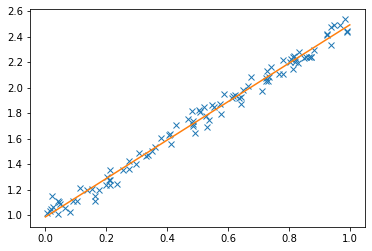

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x, y, "x")
x_test = torch.linspace(0, 1, 10)
with torch.no_grad():
    y_pred = model_prediction(x_test, w, bias)
plt.plot(x_test, y_pred)
plt.show()

### Loading a .csv dataset

We can take advantage of the interoperability between NumPy and PyTorch by loading a .csv data as a NumPy array and transforming it into a PyTorch Tensor using `torch.from_numpy(dataset_np)`. 

In [17]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request

urllib.request.urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    "./winequality-red.csv",
)

('./winequality-red.csv', <http.client.HTTPMessage at 0x7f64413cf8d0>)

In [18]:
import numpy as np

# In the line below we avoid the first row (skiprows=1) of .csv file that contains names;
# the delimiter which separates data-points within this file is ";"
wine_np = np.loadtxt( "./winequality-red.csv", dtype=np.float32, delimiter=";", skiprows=1)
wine_torch = torch.from_numpy(wine_np)  # We take advantage of the interoperability with NumPy
wine_torch

tensor([[ 7.4000,  0.7000,  0.0000,  ...,  0.5600,  9.4000,  5.0000],
        [ 7.8000,  0.8800,  0.0000,  ...,  0.6800,  9.8000,  5.0000],
        [ 7.8000,  0.7600,  0.0400,  ...,  0.6500,  9.8000,  5.0000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  0.7500, 11.0000,  6.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  0.7100, 10.2000,  5.0000],
        [ 6.0000,  0.3100,  0.4700,  ...,  0.6600, 11.0000,  6.0000]])

### Revisiting linear regression for the Rented Bike Dataset of lab notebook 2

We will implement a linear regression model for the Rented Bike dataset previously used in Lab 2. We will employ the same data preparation process using `sklearn.preprocessing`: the OneHotEncoder() allows us to transform a categorical variable to a one-hot encoded representation, and StandardScaler() performs feature scaling by standardisation.

In [19]:
import urllib.request

urllib.request.urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv",
    "./SeoulBikeData.csv",
)

('./SeoulBikeData.csv', <http.client.HTTPMessage at 0x7f6440ae11d0>)

The following code was borrowed from Lab Notebook 2. You can go back to that Notebook for details.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

bike_sharing_data = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")
bike_sharing_data = bike_sharing_data.drop("Date", axis=1)

for col in ["Rented Bike Count", "Hour", "Humidity(%)", "Visibility (10m)"]:
    bike_sharing_data[col] = bike_sharing_data[col].astype("float64")

attributes_cat = ["Seasons", "Holiday", "Functioning Day"]
attributes_num = [
    "Hour",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)",
]

# We split our dataset for training and testing
bs_train_set, bs_test_set = train_test_split(
    bike_sharing_data, test_size=0.15, random_state=42
)

full_transform = ColumnTransformer(
    [
        ("num", StandardScaler(), attributes_num),
        ("cat", OneHotEncoder(), attributes_cat),
    ]
)

# We separate the features from the labels
bs_train_set_attributes = bs_train_set.drop("Rented Bike Count", axis=1)
bs_test_set_attributes = bs_test_set.drop("Rented Bike Count", axis=1)
bs_train_set_labels = bs_train_set["Rented Bike Count"]
bs_test_set_labels = bs_test_set["Rented Bike Count"]

We now use the function `torch.from_numpy()` to transform the data previously prepared, into a PyTorch tensor. We make sure to add a column of ones to the attributes (remember that $x_0=1$) both in the train and test sets.

In [21]:
# We apply the preprocessing transformation over the features of the training data
bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)
bs_test_set_attributes_prepared = full_transform.transform(bs_test_set_attributes)

train_torch = torch.from_numpy(bs_train_set_attributes_prepared)

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector
train_torch = torch.cat((torch.ones([train_torch.shape[0], 1], dtype=torch.float64), train_torch), 1)
test_torch = torch.from_numpy(bs_test_set_attributes_prepared)

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector
test_torch = torch.cat((torch.ones([test_torch.shape[0], 1], dtype=torch.float64), test_torch), 1)
train_label_torch = torch.from_numpy(bs_train_set_labels.values)

test_label_torch = torch.from_numpy(bs_test_set_labels.values)

We create a vector of weights $\mathbf{w}$ with the corresponding flag for the gradient and two functions, one for prediction and one for the loss function.

In [22]:
# We create the vector of weights to be optimised in the linear regression model
dim = train_torch.shape[1]
w = torch.randn([dim, 1], dtype=torch.float64)  # vector of weight w is a vector of shape (dim x 1)
w.requires_grad_(True)

# We create the model prediction which consists on an inner product X'w, where X is a design matrix of shape (N x dim)
def model_prediction_lr(x, w):
    return torch.matmul(x, w)


def loss_function_lr(y, y_pred):
    return ((y_pred - y) ** 2).mean()  # Mean Squared Error (MSE)

We finally use gradient descent to find the optimal value for $\mathbf{w}$:

\begin{align}
\mathbf{w}_{k+1} = \mathbf{w}_k - \eta \frac{dE(\mathbf{w})}{d\mathbf{w}}
\end{align}

In [23]:
# Training the model with gradient descent

max_n_iter = 50  # If you have many iterations, this process can take some time
step_size = 0.001
for n_iter in range(max_n_iter):
    y_approx = model_prediction_lr(train_torch, w)
    my_loss = loss_function_lr(train_label_torch, y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad;
    # notice that here it is not necessary to pass a vector since loss_function is a scalar function

    my_loss.backward()

    with torch.no_grad():  # This line avoids the gradient update whilst allowing us to change the value of w
        w -= (step_size * w.grad)  # It is necessary to avoid the grad update whilst modifying the variable

    # Zero the gradients to avoid acummulation
    w.grad.zero_()

    if n_iter % 20 == 0 or n_iter == max_n_iter - 1:
        print(f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}")

Iteration = 1, Loss = 915978.97776092
Iteration = 21, Loss = 806349.66581845
Iteration = 41, Loss = 720953.22943523
Iteration = 50, Loss = 688956.67105593


We finally provide the root mean squared error (RMSE), evaluated on the test set:

In [24]:
# RMSE over the test set

y_pred_test = model_prediction_lr(test_torch, w)
MSE_test = loss_function_lr(test_label_torch, y_pred_test)
print(
    "The Root Mean Squared Error over the test set is:",
    np.sqrt(MSE_test.detach().numpy()),
)

The Root Mean Squared Error over the test set is: 820.4256041279748


### Question 2

Implement the prediction using an exponential transformation for model_prediction_lr, i.e., $y_{\text{approx}} = \exp(\mathbf{w}^{\top}\mathbf{x})$. Since the labels are positive values, this transformation guarrantees that the predictions are always positive. Hint: Be careful initialising w and updating it with big step_sizes.

In [25]:
### ANSWER ###

# Initialize w:
dim = train_torch.shape[1]
w = torch.zeros([dim, 1], dtype=torch.float64)  # vector of weight w is a vector (dim x 1)
w.requires_grad_(True)


def model_prediction_lr_exp_transf(x, w):
    return torch.exp(torch.matmul(x, w))


# Training the model with gradient descent

max_n_iter = 1000  # If you have many iterations, this process can take some time
step_size = 0.000001
for n_iter in range(max_n_iter):
    y_approx = model_prediction_lr_exp_transf(train_torch, w)
    my_loss = loss_function_lr(train_label_torch, y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad;
    # notice that here it is not necessary to pass a vector since loss_function is a scalar function

    my_loss.backward()

    with torch.no_grad():  # this line avoids the gradient update while allowing to change the value of w
        w -= (step_size * w.grad)  # it is necessary to avoid the grad update while modifying the variable

    # Zero gradients to avoid acummulation
    w.grad.zero_()

    if n_iter % 20 == 0 or n_iter == max_n_iter - 1:
        print(f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}")

Iteration = 1, Loss = 913361.08246038
Iteration = 21, Loss = 913226.76417907
Iteration = 41, Loss = 913064.00528737
Iteration = 61, Loss = 912862.69877708
Iteration = 81, Loss = 912607.30833449
Iteration = 101, Loss = 912272.66140669
Iteration = 121, Loss = 911815.11938133
Iteration = 141, Loss = 911151.88219921
Iteration = 161, Loss = 910104.51806454
Iteration = 181, Loss = 908205.80859799
Iteration = 201, Loss = 903729.04583934
Iteration = 221, Loss = 881394.91981947
Iteration = 241, Loss = 475479.28927356
Iteration = 261, Loss = 482250.07505789
Iteration = 281, Loss = 454625.36244886
Iteration = 301, Loss = 537212.65849389
Iteration = 321, Loss = 452165.99853304
Iteration = 341, Loss = 444915.23396146
Iteration = 361, Loss = 575515.96161309
Iteration = 381, Loss = 435181.86642455
Iteration = 401, Loss = 445454.70511127
Iteration = 421, Loss = 500043.15644263
Iteration = 441, Loss = 453725.40163459
Iteration = 461, Loss = 444707.41466859
Iteration = 481, Loss = 474824.50996222
Iterat

In [26]:
# RMSE over the test set

y_pred_test = model_prediction_lr_exp_transf(test_torch, w)
MSE_test = loss_function_lr(test_label_torch, y_pred_test)
print(
    "The Root Mean Squared Error over the test set is:",
    np.sqrt(MSE_test.detach().numpy()),
)

The Root Mean Squared Error over the test set is: 651.831000107309
